<a href="https://colab.research.google.com/github/christophersingh/Cardiovascular-Predictive-Modeling/blob/main/Cardiovascular_Disease.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
""" Link To Kaggle Dataset: 
https://www.kaggle.com/sulianova/cardiovascular-disease-dataset
"""

! pip install -q kaggle
from google.colab import files 
files.upload()
! mkdir ~/.kaggle 
! cp kaggle.json ~/.kaggle/
! chmod 600 ~/.kaggle/kaggle.json

!kaggle datasets download -d sulianova/cardiovascular-disease-dataset

!unzip cardiovascular-disease-dataset.zip

mkdir: cannot create directory ‘/root/.kaggle’: File exists
cardiovascular-disease-dataset.zip: Skipping, found more recently modified local copy (use --force to force download)
Archive:  cardiovascular-disease-dataset.zip
replace cardio_train.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: A
  inflating: cardio_train.csv        


Data description

Features:

    Age | age | int (days)
    Height | height | int (cm) |
    Weight | weight | float (kg) |
    Gender | gender | categorical code | 1: women, 2: man
    Systolic blood pressure | ap_hi | int |
    Diastolic blood pressure | ap_lo | int |
    Cholesterol | cholesterol | 1: normal, 2: above normal, 3: well above normal |
    Glucose | gluc | 1: normal, 2: above normal, 3: well above normal |
    Smoking | smoke | binary |
    Alcohol intake | alco | binary |
    Physical activity | active | binary |
    **Presence or absence of cardiovascular disease** | **Target Variable** | cardio | binary |

All of the dataset values were collected at the moment of medical examination. 

In [64]:
import pandas as pd

df = pd.read_csv('/content/cardio_train.csv',sep=";")
df

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
69995,99993,19240,2,168,76.0,120,80,1,1,1,0,1,0
69996,99995,22601,1,158,126.0,140,90,2,2,0,0,1,1
69997,99996,19066,2,183,105.0,180,90,3,1,0,1,0,1
69998,99998,22431,1,163,72.0,135,80,1,2,0,0,0,1


Add BMI Column, need to convert cm to m for the height column. 

BMI = weight / height * height

In [65]:
df['height'] = df['height'] / 100

Calculate the body mass index based on height and weight

In [66]:
df['BMI'] = (df['weight'])/((df['height']) * df['height'])
df

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,BMI
0,0,18393,2,1.68,62.0,110,80,1,1,0,0,1,0,21.967120
1,1,20228,1,1.56,85.0,140,90,3,1,0,0,1,1,34.927679
2,2,18857,1,1.65,64.0,130,70,3,1,0,0,0,1,23.507805
3,3,17623,2,1.69,82.0,150,100,1,1,0,0,1,1,28.710479
4,4,17474,1,1.56,56.0,100,60,1,1,0,0,0,0,23.011177
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69995,99993,19240,2,1.68,76.0,120,80,1,1,1,0,1,0,26.927438
69996,99995,22601,1,1.58,126.0,140,90,2,2,0,0,1,1,50.472681
69997,99996,19066,2,1.83,105.0,180,90,3,1,0,1,0,1,31.353579
69998,99998,22431,1,1.63,72.0,135,80,1,2,0,0,0,1,27.099251


Define obesity levels based on thresholds from the CDC. Link Below:

https://www.cdc.gov/obesity/adult/defining.html

In [67]:
BMI = list(df['BMI'])
print(BMI)
obesity = []
numeric = []
for x in range(len(BMI)):
  if (BMI[x] <= 18.5):
    obesity.append('Under Weight')
    numeric.append(0)
  elif (18.5 < BMI[x] <= 25):
    obesity.append('Normal')
    numeric.append(1)
  elif (25 < BMI[x] <= 30):
    obesity.append('Overweight')
    numeric.append(2)
  elif (30 < BMI[x] <= 35):
    obesity.append('Class 1 Obesity')
    numeric.append(3)
  elif (35 < BMI[x] <= 40):
    obesity.append('Class 2 Obesity')
    numeric.append(4)
  else: 
    obesity.append('Class 3 Obesity')
    numeric.append(5)

df['obesity_level'] = obesity

[21.9671201814059, 34.927679158448385, 23.507805325987146, 28.71047932495361, 23.011176857330703, 29.384676110696898, 37.72972534382733, 29.983587930816814, 28.44095497516423, 25.282569898869724, 28.01022373166206, 20.04744562130375, 22.03856749311295, 31.244992789617044, 28.997893837184456, 37.85830178474852, 25.95155709342561, 20.82999519307803, 28.67262607522348, 21.338210638622158, 31.239414355075468, 27.993022029291247, 36.05191475725044, 18.49112426035503, 23.529411764705884, 27.76709812465291, 24.243918474687703, 30.853209920493647, 23.95122659311947, 25.909456951787405, 43.7044745057232, 24.859073561850078, 23.73323840037973, 28.515624999999993, 27.39817568244846, 20.70081674131507, 31.020408163265305, 26.026174895895306, 27.43484224965706, 25.71166207529844, 25.153150229218223, 21.461936624163616, 23.59700420642249, 24.919900320398717, 21.0828132906055, 24.38652644413961, 40.77122389879591, 24.44727891156463, 22.857142857142858, 23.87543252595156, 29.296874999999993, 29.410734

In [68]:
df

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,BMI,obesity_level
0,0,18393,2,1.68,62.0,110,80,1,1,0,0,1,0,21.967120,Normal
1,1,20228,1,1.56,85.0,140,90,3,1,0,0,1,1,34.927679,Class 1 Obesity
2,2,18857,1,1.65,64.0,130,70,3,1,0,0,0,1,23.507805,Normal
3,3,17623,2,1.69,82.0,150,100,1,1,0,0,1,1,28.710479,Overweight
4,4,17474,1,1.56,56.0,100,60,1,1,0,0,0,0,23.011177,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69995,99993,19240,2,1.68,76.0,120,80,1,1,1,0,1,0,26.927438,Overweight
69996,99995,22601,1,1.58,126.0,140,90,2,2,0,0,1,1,50.472681,Class 3 Obesity
69997,99996,19066,2,1.83,105.0,180,90,3,1,0,1,0,1,31.353579,Class 1 Obesity
69998,99998,22431,1,1.63,72.0,135,80,1,2,0,0,0,1,27.099251,Overweight


In [69]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70000 entries, 0 to 69999
Data columns (total 15 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             70000 non-null  int64  
 1   age            70000 non-null  int64  
 2   gender         70000 non-null  int64  
 3   height         70000 non-null  float64
 4   weight         70000 non-null  float64
 5   ap_hi          70000 non-null  int64  
 6   ap_lo          70000 non-null  int64  
 7   cholesterol    70000 non-null  int64  
 8   gluc           70000 non-null  int64  
 9   smoke          70000 non-null  int64  
 10  alco           70000 non-null  int64  
 11  active         70000 non-null  int64  
 12  cardio         70000 non-null  int64  
 13  BMI            70000 non-null  float64
 14  obesity_level  70000 non-null  object 
dtypes: float64(3), int64(11), object(1)
memory usage: 8.0+ MB


In [70]:
df.drop("id",axis=1,inplace=True)

In [71]:
df

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,BMI,obesity_level
0,18393,2,1.68,62.0,110,80,1,1,0,0,1,0,21.967120,Normal
1,20228,1,1.56,85.0,140,90,3,1,0,0,1,1,34.927679,Class 1 Obesity
2,18857,1,1.65,64.0,130,70,3,1,0,0,0,1,23.507805,Normal
3,17623,2,1.69,82.0,150,100,1,1,0,0,1,1,28.710479,Overweight
4,17474,1,1.56,56.0,100,60,1,1,0,0,0,0,23.011177,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69995,19240,2,1.68,76.0,120,80,1,1,1,0,1,0,26.927438,Overweight
69996,22601,1,1.58,126.0,140,90,2,2,0,0,1,1,50.472681,Class 3 Obesity
69997,19066,2,1.83,105.0,180,90,3,1,0,1,0,1,31.353579,Class 1 Obesity
69998,22431,1,1.63,72.0,135,80,1,2,0,0,0,1,27.099251,Overweight


Convert all columns to float64

In [72]:
df['age'] = df['age'].astype(float)
df['gender'] = df['gender'].astype(float)
df['height'] = df['height'].astype(float)
df['weight'] = df['weight'].astype(float)
df['ap_hi'] = df['ap_hi'].astype(float)
df['ap_lo'] = df['ap_lo'].astype(float)
df['cholesterol'] = df['cholesterol'].astype(float)
df['gluc'] = df['gluc'].astype(float)
df['smoke'] = df['smoke'].astype(float)
df['alco'] = df['alco'].astype(float)
df['active'] = df['active'].astype(float)
df['BMI'] = df['BMI'].astype(float)
df['cardio'] = df['cardio'].astype(float)

Statistics By Column

In [73]:
df.describe()

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,BMI
count,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000
mean,19468.865814,1.349571,1.643592,74.205690,128.817286,96.630414,1.366871,1.226457,0.088129,0.053771,0.803729,0.499700,27.556513
std,2467.251667,0.476838,0.082101,14.395757,154.011419,188.472530,0.680250,0.572270,0.283484,0.225568,0.397179,0.500003,6.091511
min,10798.000000,1.000000,0.550000,10.000000,-150.000000,-70.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,3.471784
25%,17664.000000,1.000000,1.590000,65.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,23.875115
50%,19703.000000,1.000000,1.650000,72.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,26.374068
75%,21327.000000,2.000000,1.700000,82.000000,140.000000,90.000000,2.000000,1.000000,0.000000,0.000000,1.000000,1.000000,30.222222
max,23713.000000,2.000000,2.500000,200.000000,16020.000000,11000.000000,3.000000,3.000000,1.000000,1.000000,1.000000,1.000000,298.666667


In [74]:
df.isnull()

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,BMI,obesity_level
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69995,False,False,False,False,False,False,False,False,False,False,False,False,False,False
69996,False,False,False,False,False,False,False,False,False,False,False,False,False,False
69997,False,False,False,False,False,False,False,False,False,False,False,False,False,False
69998,False,False,False,False,False,False,False,False,False,False,False,False,False,False


Check for any missing values

In [75]:
df.isna().any().any()

False

False output means that there are no missing values

Visualization 1: Group the data according to gender and count the rows. Then use a bar chart to see basic statistics by gender

In [76]:
dfGender = df.groupby('gender').std()

In [77]:
dfGender

,age,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,BMI
gender,,,,,,,,,,,,
1.0,2432.024493,0.070527,14.238838,158.054522,174.776855,0.693417,0.582956,0.132431,0.157639,0.398481,0.499995,6.495638
2.0,2529.752770,0.072289,14.187636,146.186152,211.557292,0.653764,0.551493,0.413496,0.308323,0.394734,0.499983,5.162752


The bar graph below shows the counts of cardiovascular infections by gender and whether or not they have the disease

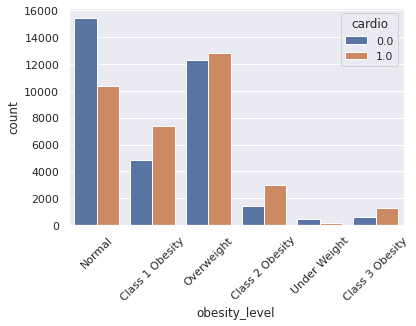

In [78]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
%matplotlib inline
sns.countplot(x='obesity_level', data=df, hue='cardio')
plt.xticks(rotation=45)
plt.show()

The graph below shows the counts of cardiovascular disease based on glucose sugar levels where the blue bar means they don't have the disease and the brown bar means they have it.

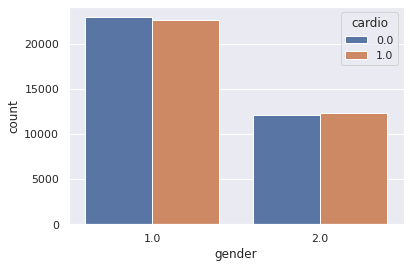

In [79]:
sns.countplot(x='gender', hue='cardio', data=df)
plt.show()

Represent obesity level in a numerical format

In [80]:
df['obesity_level'] = numeric
df

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,BMI,obesity_level
0,18393.0,2.0,1.68,62.0,110.0,80.0,1.0,1.0,0.0,0.0,1.0,0.0,21.967120,1
1,20228.0,1.0,1.56,85.0,140.0,90.0,3.0,1.0,0.0,0.0,1.0,1.0,34.927679,3
2,18857.0,1.0,1.65,64.0,130.0,70.0,3.0,1.0,0.0,0.0,0.0,1.0,23.507805,1
3,17623.0,2.0,1.69,82.0,150.0,100.0,1.0,1.0,0.0,0.0,1.0,1.0,28.710479,2
4,17474.0,1.0,1.56,56.0,100.0,60.0,1.0,1.0,0.0,0.0,0.0,0.0,23.011177,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69995,19240.0,2.0,1.68,76.0,120.0,80.0,1.0,1.0,1.0,0.0,1.0,0.0,26.927438,2
69996,22601.0,1.0,1.58,126.0,140.0,90.0,2.0,2.0,0.0,0.0,1.0,1.0,50.472681,5
69997,19066.0,2.0,1.83,105.0,180.0,90.0,3.0,1.0,0.0,1.0,0.0,1.0,31.353579,3
69998,22431.0,1.0,1.63,72.0,135.0,80.0,1.0,2.0,0.0,0.0,0.0,1.0,27.099251,2


In [81]:
df = df[['age', 'gender', 'height', 'weight', 'ap_hi', 'ap_lo', 'cholesterol', 'gluc', 'smoke', 'alco', 'active', 'BMI', 'obesity_level', 'cardio']]

In [82]:
df

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,BMI,obesity_level,cardio
0,18393.0,2.0,1.68,62.0,110.0,80.0,1.0,1.0,0.0,0.0,1.0,21.967120,1,0.0
1,20228.0,1.0,1.56,85.0,140.0,90.0,3.0,1.0,0.0,0.0,1.0,34.927679,3,1.0
2,18857.0,1.0,1.65,64.0,130.0,70.0,3.0,1.0,0.0,0.0,0.0,23.507805,1,1.0
3,17623.0,2.0,1.69,82.0,150.0,100.0,1.0,1.0,0.0,0.0,1.0,28.710479,2,1.0
4,17474.0,1.0,1.56,56.0,100.0,60.0,1.0,1.0,0.0,0.0,0.0,23.011177,1,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69995,19240.0,2.0,1.68,76.0,120.0,80.0,1.0,1.0,1.0,0.0,1.0,26.927438,2,0.0
69996,22601.0,1.0,1.58,126.0,140.0,90.0,2.0,2.0,0.0,0.0,1.0,50.472681,5,1.0
69997,19066.0,2.0,1.83,105.0,180.0,90.0,3.0,1.0,0.0,1.0,0.0,31.353579,3,1.0
69998,22431.0,1.0,1.63,72.0,135.0,80.0,1.0,2.0,0.0,0.0,0.0,27.099251,2,1.0


For ML purposes remove the target variable (cardio) from the dataset

In [83]:
X = df.values[:, 0:13]
Y = df.values[:,-1]

Import decision tree library and fit data to the model

In [84]:
import sklearn 
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split( X, Y, test_size = 0.3, random_state = 100)

In [85]:
X_train

array([[1.66900000e+04, 2.00000000e+00, 1.68000000e+00, ...,
        0.00000000e+00, 2.23214286e+01, 1.00000000e+00],
       [2.13610000e+04, 2.00000000e+00, 1.65000000e+00, ...,
        1.00000000e+00, 2.42424242e+01, 1.00000000e+00],
       [1.74200000e+04, 2.00000000e+00, 1.72000000e+00, ...,
        0.00000000e+00, 3.21119524e+01, 3.00000000e+00],
       ...,
       [1.94570000e+04, 1.00000000e+00, 1.65000000e+00, ...,
        0.00000000e+00, 2.38751148e+01, 1.00000000e+00],
       [2.04970000e+04, 2.00000000e+00, 1.68000000e+00, ...,
        1.00000000e+00, 3.22420635e+01, 3.00000000e+00],
       [1.83220000e+04, 1.00000000e+00, 1.50000000e+00, ...,
        1.00000000e+00, 3.55555556e+01, 4.00000000e+00]])

In [86]:
dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

Make a prediction on the decision tree from the X_test variable

In [87]:
y_pred = dt.predict(X_test)

Print out confusion matrix for the decision tree

In [88]:
import numpy as np
from sklearn.metrics import confusion_matrix
result = np.array(y_test)
predictions = np.array(y_pred)
confusion_matrix(result, predictions)

array([[6555, 3889],
       [3852, 6704]])

Make a prediction on unseen/made up data

In [89]:
data = [[10000, 2, 1.80, 85, 110, 60, 2, 1, 0, 1, 0, 20, 1]]
new_data = dt.predict(data)
new_data

array([0.])

In [90]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         0.0       0.63      0.63      0.63     10444
         1.0       0.63      0.64      0.63     10556

    accuracy                           0.63     21000
   macro avg       0.63      0.63      0.63     21000
weighted avg       0.63      0.63      0.63     21000



Import Naive Bayes Classifier and fit the data

In [91]:
from sklearn.naive_bayes import GaussianNB
model = GaussianNB()
model.fit(X, Y);

Make a prediction

In [92]:
y_pred = model.predict(X_test)
y_pred

array([0., 0., 0., ..., 0., 0., 1.])

View the confusion matrix for the model

In [93]:
result = np.array(y_test)
predictions = np.array(y_pred)
confusion_matrix(result, predictions)

array([[8896, 1548],
       [6904, 3652]])

In [94]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         0.0       0.56      0.85      0.68     10444
         1.0       0.70      0.35      0.46     10556

    accuracy                           0.60     21000
   macro avg       0.63      0.60      0.57     21000
weighted avg       0.63      0.60      0.57     21000



Predict on the same unseen data as before

In [95]:
data = [[10000, 2, 1.80, 85, 110, 60, 2, 1, 0, 1, 0, 20, 1]]
new_data = model.predict(data)
new_data

array([0.])

Analysis Continued

In [96]:
import pandas as pd
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (20,10)
from sklearn import model_selection
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.linear_model import LogisticRegression
import warnings
warnings.filterwarnings("ignore")

In [97]:
def min_max_normalization(df):
    # copy the dataframe
    df_norm = df.copy()
    # apply min-max scaling
    for column in df_norm.columns:
        df_norm[column] = (df_norm[column] - df_norm[column].min()) / (df_norm[column].max() - df_norm[column].min())
        
    return df_norm

data = min_max_normalization(df)
df = data
df

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,BMI,obesity_level,cardio
0,0.588076,1.0,0.579487,0.273684,0.016079,0.013550,0.0,0.0,0.0,0.0,1.0,0.062655,0.2,0.0
1,0.730159,0.0,0.517949,0.394737,0.017934,0.014453,1.0,0.0,0.0,0.0,1.0,0.106560,0.6,1.0
2,0.624003,0.0,0.564103,0.284211,0.017316,0.012647,1.0,0.0,0.0,0.0,0.0,0.067874,0.2,1.0
3,0.528455,1.0,0.584615,0.378947,0.018553,0.015357,0.0,0.0,0.0,0.0,1.0,0.085498,0.4,1.0
4,0.516918,0.0,0.517949,0.242105,0.015461,0.011743,0.0,0.0,0.0,0.0,0.0,0.066192,0.2,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69995,0.653659,1.0,0.579487,0.347368,0.016698,0.013550,0.0,0.0,1.0,0.0,1.0,0.079458,0.4,0.0
69996,0.913899,0.0,0.528205,0.610526,0.017934,0.014453,0.5,0.5,0.0,0.0,1.0,0.159220,1.0,1.0
69997,0.640186,1.0,0.656410,0.500000,0.020408,0.014453,1.0,0.0,0.0,1.0,0.0,0.094452,0.6,1.0
69998,0.900736,0.0,0.553846,0.326316,0.017625,0.013550,0.0,0.5,0.0,0.0,0.0,0.080040,0.4,1.0


In [98]:
#Set predicitve variables
 
X = df.values[:, 0:13]
Y = df.values[:,-1]

In [99]:
random_seed = 12

In [100]:
import pandas as pd
from sklearn import preprocessing

min_max_scaler = preprocessing.MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(X)
X = pd.DataFrame(x_scaled)

In [101]:
outcome = []
model_names = []
models = [('LogReg', LogisticRegression()), 
          ('DecTree', DecisionTreeClassifier()),
          ('KNN', KNeighborsClassifier()),
          ('LinDisc', LinearDiscriminantAnalysis()),
          ('GaussianNB', GaussianNB())]

In [102]:
for model_name, model in models:
    k_fold_validation = model_selection.KFold(n_splits=10, random_state=random_seed)
    results = model_selection.cross_val_score(model, X, Y, cv=k_fold_validation, scoring='accuracy')
    outcome.append(results)
    model_names.append(model_name)
    output_message = "%s| Mean=%f" % (model_name, results.mean())
    print(output_message)

LogReg| Mean=0.647700
DecTree| Mean=0.632557
KNN| Mean=0.603429
LinDisc| Mean=0.647457
GaussianNB| Mean=0.603557


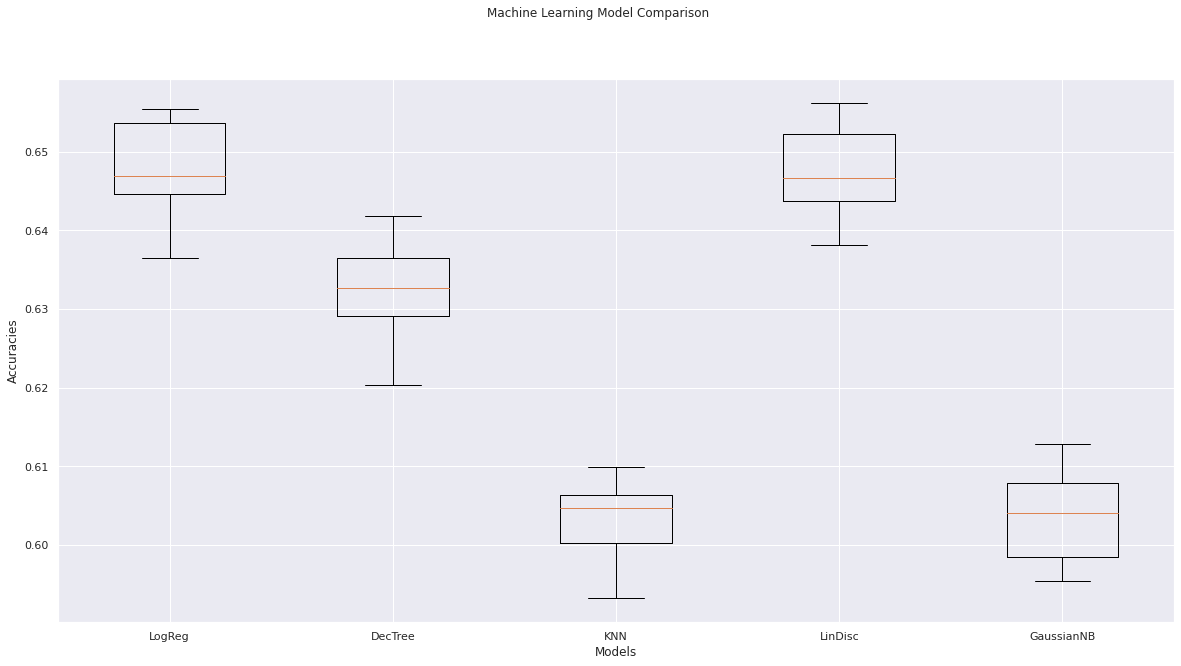

In [103]:
fig = plt.figure()
fig.suptitle('Machine Learning Model Comparison')
ax = fig.add_subplot(111)
plt.boxplot(outcome)
plt.xlabel('Models')
plt.ylabel('Accuracies')
ax.set_xticklabels(model_names)
plt.show()

In [104]:
import numpy as np

uniqueValues, occurCount = np.unique(Y, return_counts=True)
 
print("Unique Values : " , uniqueValues)
print("Occurrence Count : ", occurCount)

Unique Values :  [0. 1.]
Occurrence Count :  [35021 34979]


In [105]:
import numpy as nump
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler
enc = OneHotEncoder()
Y = enc.fit_transform(Y[:, nump.newaxis]).toarray()

In [106]:
X = df.values[:, 0:13]
Y = df.values[:,-1]
from sklearn.model_selection import train_test_split
X_train,X_test, y_train, y_test = train_test_split(X,Y,test_size=0.2,random_state=42)

In [107]:
Y

array([0., 1., 1., ..., 1., 1., 0.])

In [108]:
df

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,BMI,obesity_level,cardio
0,0.588076,1.0,0.579487,0.273684,0.016079,0.013550,0.0,0.0,0.0,0.0,1.0,0.062655,0.2,0.0
1,0.730159,0.0,0.517949,0.394737,0.017934,0.014453,1.0,0.0,0.0,0.0,1.0,0.106560,0.6,1.0
2,0.624003,0.0,0.564103,0.284211,0.017316,0.012647,1.0,0.0,0.0,0.0,0.0,0.067874,0.2,1.0
3,0.528455,1.0,0.584615,0.378947,0.018553,0.015357,0.0,0.0,0.0,0.0,1.0,0.085498,0.4,1.0
4,0.516918,0.0,0.517949,0.242105,0.015461,0.011743,0.0,0.0,0.0,0.0,0.0,0.066192,0.2,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69995,0.653659,1.0,0.579487,0.347368,0.016698,0.013550,0.0,0.0,1.0,0.0,1.0,0.079458,0.4,0.0
69996,0.913899,0.0,0.528205,0.610526,0.017934,0.014453,0.5,0.5,0.0,0.0,1.0,0.159220,1.0,1.0
69997,0.640186,1.0,0.656410,0.500000,0.020408,0.014453,1.0,0.0,0.0,1.0,0.0,0.094452,0.6,1.0
69998,0.900736,0.0,0.553846,0.326316,0.017625,0.013550,0.0,0.5,0.0,0.0,0.0,0.080040,0.4,1.0


In [109]:
from sklearn import preprocessing

In [110]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
import tensorflow
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout

tensorflow.keras.backend.set_floatx('float64')

# fix random seed for reproducibility
np.random.seed(7)

model = Sequential()
model.add(Dense(7, input_dim=13, activation='relu'))
model.add(Dense(1, activation='sigmoid'))


model.compile(optimizer='Adam', loss='binary_crossentropy', metrics=['accuracy'])

In [111]:
ann = model.fit(X_train, y_train, epochs=400, batch_size=1024, validation_data = (X_test,y_test), shuffle=True)

Epoch 1/400
55/55 [==============================] - 0s 5ms/step - loss: 0.6836 - accuracy: 0.5559 - val_loss: 0.6788 - val_accuracy: 0.5981
Epoch 2/400
55/55 [==============================] - 0s 3ms/step - loss: 0.6771 - accuracy: 0.5964 - val_loss: 0.6736 - val_accuracy: 0.6085
Epoch 3/400
55/55 [==============================] - 0s 3ms/step - loss: 0.6723 - accuracy: 0.6077 - val_loss: 0.6684 - val_accuracy: 0.6148
Epoch 4/400
55/55 [==============================] - 0s 3ms/step - loss: 0.6656 - accuracy: 0.6160 - val_loss: 0.6594 - val_accuracy: 0.6225
Epoch 5/400
55/55 [==============================] - 0s 3ms/step - loss: 0.6574 - accuracy: 0.6229 - val_loss: 0.6521 - val_accuracy: 0.6206
Epoch 6/400
55/55 [==============================] - 0s 3ms/step - loss: 0.6508 - accuracy: 0.6259 - val_loss: 0.6458 - val_accuracy: 0.6302
Epoch 7/400
55/55 [==============================] - 0s 3ms/step - loss: 0.6460 - accuracy: 0.6318 - val_loss: 0.6412 - val_accuracy: 0.6349
Epoch 8/400
5

In [112]:
(loss_score, accuracy_score) = model.evaluate(X_test,y_test,verbose=0)
print('Loss score',loss_score)
print('Accuracy score',accuracy_score)

Loss score 0.5830238308906556
Accuracy score 0.7039285714285715


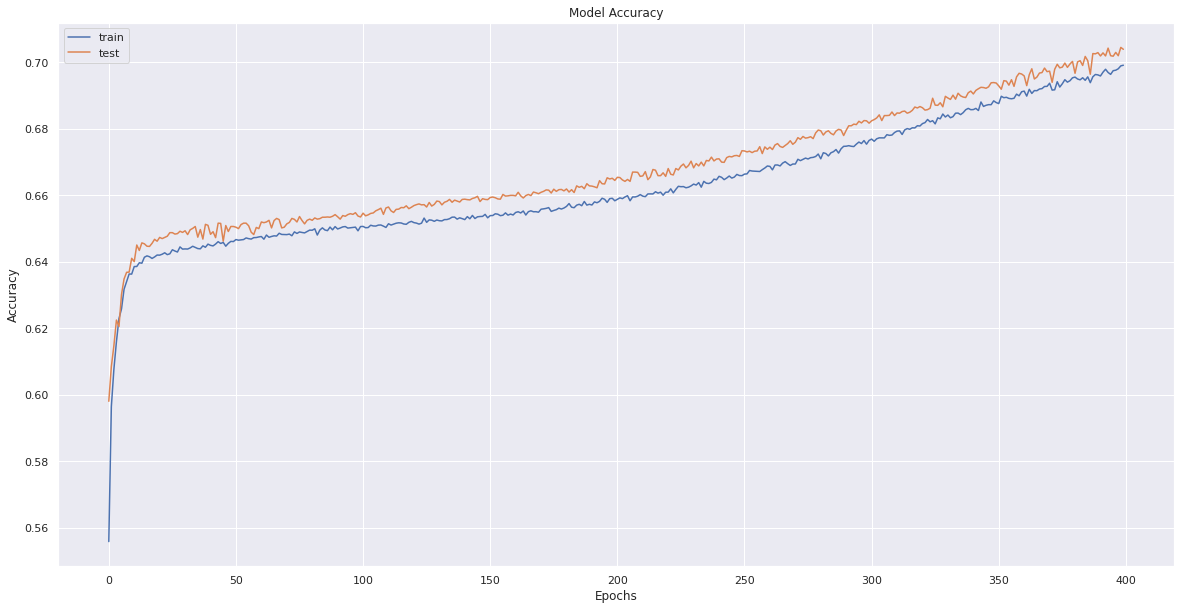

In [113]:
plt.plot(ann.history['accuracy'])
plt.plot(ann.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend(['train', 'test'])
plt.show()

In [114]:
pred=model.predict(X_test)
pred_digits=np.argmax(pred,axis=1)

In [115]:
from sklearn.metrics import classification_report
print(classification_report(y_test, pred.round()))

              precision    recall  f1-score   support

         0.0       0.70      0.71      0.71      6988
         1.0       0.71      0.70      0.70      7012

    accuracy                           0.70     14000
   macro avg       0.70      0.70      0.70     14000
weighted avg       0.70      0.70      0.70     14000

